# Choose Your Own Analysis
Jessica Bring 730394024

## Hypothesis: 

Computer Science Majors are **more likely** to highly rate the effectiveness of the quizzes than non-compsci majors.

Autoreloading the Data:

In [1]:
    %reload_ext autoreload
    %autoreload 2

Retrieving the data from the csv file `{survey.csv}` and naming it as a variable.

In [2]:
DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

Using the `read_csv_rows` function from `data_utils.py` to move the data into the Python kernel's memory for analysis. 
This will print out some info about the length of the csv's rows/columns and column names.

In [3]:
from data_utils import read_csv_rows
data_rows: list[dict[str, str]] = read_csv_rows(DATA_FILE_PATH)

print(f"Data File Read: {DATA_FILE_PATH}")
print(f"{len(data_rows)} rows")
print(f"{len(data_rows[0].keys())} columns")
print(f"Columns names: {data_rows[0].keys()}")

Data File Read: ../../data/survey.csv
573 rows
36 columns
Columns names: dict_keys(['row_number', 'year', 'unc_status', 'comp_major', 'primary_major', 'data_science', 'prereqs', 'prior_exp', 'AP_Principles', 'AP_A', 'other_comp', 'prior_time', 'languages', 'section', 'in_person_classes', 'hours_online_social', 'hours_online_work', 'lesson_time', 'sync_perf', 'all_sync', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'kaki_effective', 'pace', 'difficulty', 'understanding', 'interesting', 'valuable', 'would_recommend'])


**Next**, I want to use the `columnar` function to convert this row-oriented table into a column-oriented table so I can better isolate the data I want to see for my experiment.

In [4]:
from data_utils import columnar

data_cols: dict[str, list[str]] = columnar(data_rows)

Since my research revolves around the comparison of two subsets of this data; 'comp_major' and 'qz_effective', I want to use the `select` function to isolate these two columns. In order to create a slightly less overwhelming list of data, I'm inducting the `head` function so I can display a selected number of columns. I'm also using the `tabulate` function to represent my data in a table.

In [5]:
from data_utils import select
from tabulate import tabulate
from data_utils import head

selected_data: dict[str, list[str]] = select(data_cols, ["comp_major", "qz_effective"])

tabulate(head(selected_data, 10), selected_data.keys(), "html")

comp_major,qz_effective
No,5
No,5
No,7
No,7
No,5
No,5
No,5
No,4
No,7
No,6


Now, I only want to see the responses of Computer Science majors, so I am creating a `filter` function in my `data_utils` file to filter out any responses from non-comp sci majors. I'll use the tabulate function to represent the first 10 rows of data from my sample. 

In [6]:
from tabulate import tabulate
from data_utils import head
from data_utils import filter

compsci_data: dict[str, list[str]] = filter(data_rows, "Yes - BS", "Yes - BA", ["comp_major", "qz_effective"])
tabulate(head(compsci_data, 10), compsci_data.keys(), "html")

comp_major,qz_effective
Yes - BS,2
Yes - BA,2
Yes - BS,7
Yes - BA,7
Yes - BA,7
Yes - BA,5
Yes - BA,7
Yes - BS,7
Yes - BA,6
Yes - BS,7


Now, I want to count the frequency of ratings higher than 4 in both compsci majors and non-compsci majors. To do this, I'll modify the `count` function, creating my own function `frequency_greater` where I can count up user ratings of the quiz greater than four and split them into what major they were. Additionally, I created a `frequency_less` function that does the same thing with ratings less than 4. I excluded ratings of 4 because the middle response is no use to me.

In [7]:
from data_utils import frequency_greater
from data_utils import frequency_less

greater_data: dict[str, int] = frequency_greater(selected_data, 4, "qz_effective", "comp_major")
print(f"Higher ratings: {greater_data}")

less_data: dict[str, int] = frequency_less(selected_data, 4, "qz_effective", "comp_major")
print(f"Lower ratings: {less_data}")

Higher ratings: {'No': 259, 'Yes - Minor': 24, 'Yes - BS': 68, 'Yes - BA': 29}
Lower ratings: {'No': 92, 'Yes - BS': 9, 'Yes - BA': 13, 'Yes - Minor': 4}


Now, I want to represent the datasets into a graph; I will use the `pyplot` function import to do this. This will get me a graphical representation of the data so I can visually see the difference in responses when grouped into major types. After looking at this representation, I can come to my conclusion about my hypothesis and its accuracy.

<BarContainer object of 4 artists>

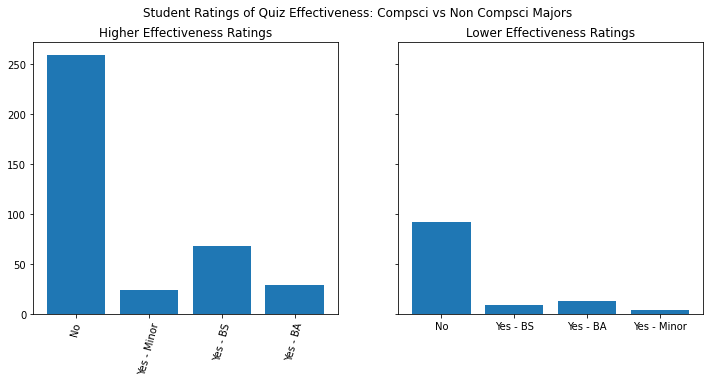

In [9]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Student Ratings of Quiz Effectiveness: Compsci vs Non Compsci Majors")


axes[0].set_title("Higher Effectiveness Ratings")
axes[0].bar(greater_data.keys(), greater_data.values())
axes[0].tick_params(axis='x', labelrotation = 75)

axes[1].set_title("Lower Effectiveness Ratings")
axes[1].bar(less_data.keys(), less_data.values())

# Conclusion

Based off of the data representation that I have been able to create with my code, it seems like my hypothesis is not supported by the data. By the looks of these graphs and the frequency data that I have been able to collect, the class as a whole seems to rate the effectiveness of the quizzes quite highly, no matter what their major is. My original assumption was that computer science majors were more likely to enjoy the quizzes because they have chosen the topic of this class as their major, and would therefore be more interested and engaged in the content, causing them to perform better and thus rate the quiz effectiveness higher. Upon further analysis, it seems like more than half of each subgroup (compsci majors/minors or not) believes that the quizzes are effective in helping them learn. My original hypothesis was based off of the notion that people who perform better on the quizzes will rate their effectiveness higher, I immediately assumed that computer science majors would perform better (because they are the direct target audience of this material) so they would be the people rating the effectiveness higher. Without having to bring any sort of percentage system into this, or looking through the average quiz grades of each students, it looks like my assumptions were incorrect. My hypothesis should be expanded upon to incorporate data regarding the average quiz grade of each student whose data is included in this csv in order to better my experiment next time. 